In [10]:
# Import libraries
import pandas_datareader as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
import warnings

In [2]:
data = pd.read_csv("BTC-USD(train).csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2298 non-null   object 
 1   Open       2298 non-null   float64
 2   High       2298 non-null   float64
 3   Low        2298 non-null   float64
 4   Close      2298 non-null   float64
 5   Adj Close  2298 non-null   float64
 6   Volume     2298 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 125.8+ KB


In [6]:
test_data = pd.read_csv("BTC-USD(test).csv")

In [7]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


Use only the close feature

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       212 non-null    object 
 1   Open       212 non-null    float64
 2   High       212 non-null    float64
 3   Low        212 non-null    float64
 4   Close      212 non-null    float64
 5   Adj Close  212 non-null    float64
 6   Volume     212 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


In [11]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

Text(0, 0.5, 'Close Price (USD)')

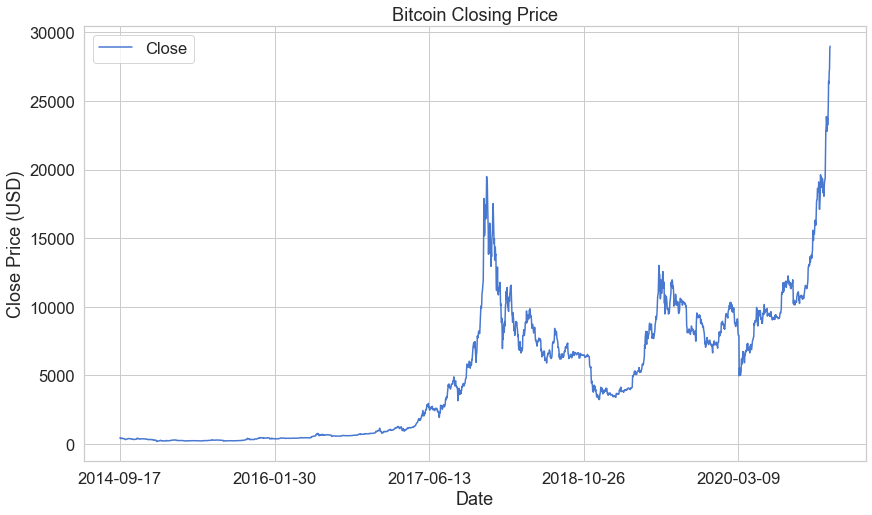

In [12]:
# Graph bitcoin price over the years
ax = data.plot(x='Date', y='Close');
ax.set_title("Bitcoin Closing Price")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

Text(0, 0.5, 'Close Price (USD)')

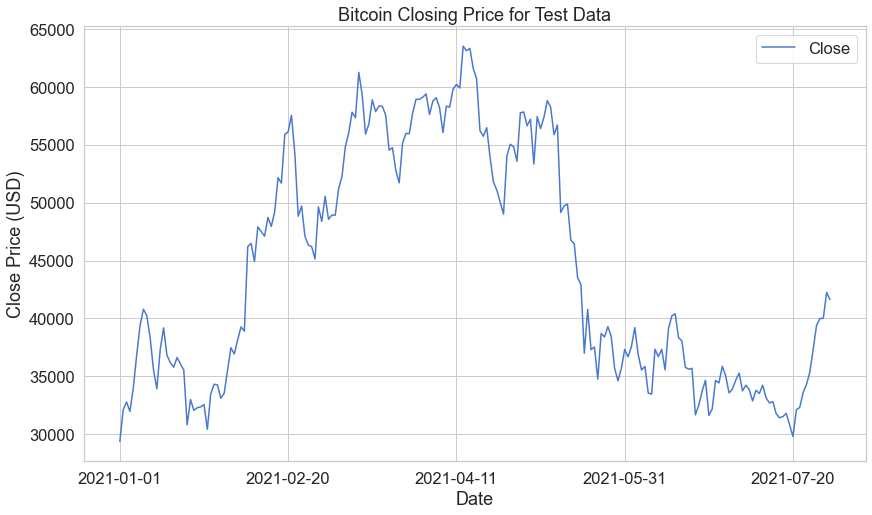

In [13]:
ax = test_data.plot(x='Date', y ='Close')
ax.set_title('Bitcoin Closing Price for Test Data')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price (USD)')

In [15]:
print(data.describe())
print("\n")
print(test_data.describe())

               Open          High           Low         Close     Adj Close  \
count   2298.000000   2298.000000   2298.000000   2298.000000   2298.000000   
mean    4922.389192   5047.789856   4795.432910   4934.732740   4934.732740   
std     4807.997278   4950.326571   4669.335328   4833.331925   4833.331925   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      445.243744    450.576500    439.364006    444.949509    444.949509   
50%     3893.746216   3959.947387   3824.346436   3896.459351   3896.459351   
75%     8387.995849   8625.518555   8189.803222   8415.871582   8415.871582   
max    28841.574219  29244.876953  28201.992188  29001.720703  29001.720703   

             Volume  
count  2.298000e+03  
mean   9.278695e+09  
std    1.315961e+10  
min    5.914570e+06  
25%    6.241190e+07  
50%    3.206705e+09  
75%    1.555892e+10  
max    7.415677e+10  


               Open          High           Low         Close     Adj Close  \
count    

In [16]:
data.isnull().sum()
test_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
df_train = data.copy()
df_valid = test_data.copy()

In [18]:
print("Train shape: ", df_train.shape)
print("Test shape: ", df_valid.shape)

Train shape:  (2298, 7)
Test shape:  (212, 7)


In [19]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Dense, LSTM, Activation
from tensorflow.keras.models import Sequential

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
# Normalization data for raw_data
close_price = data.Close.values.reshape(-1,1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape, np.isnan(scaled_close).any())

# Normalization data for test_data
close_price_test = test_data.Close.values.reshape(-1,1)
scaled_close_test = scaler.fit_transform(close_price_test)
print(scaled_close_test.shape, np.isnan(scaled_close_test).any())

(2298, 1) False
(212, 1) False


In [21]:
print(scaled_close)
print(scaled_close_test)

[[0.00968758]
 [0.00854636]
 [0.0075179 ]
 ...
 [0.94312708]
 [0.99442237]
 [1.        ]]
[[0.        ]
 [0.08066719]
 [0.09985176]
 [0.07611528]
 [0.13531707]
 [0.21829366]
 [0.29291223]
 [0.3347111 ]
 [0.31879919]
 [0.26318406]
 [0.18144243]
 [0.13328161]
 [0.23270931]
 [0.28752932]
 [0.21832308]
 [0.19935912]
 [0.1880239 ]
 [0.21260093]
 [0.19618484]
 [0.18088847]
 [0.04253081]
 [0.10640736]
 [0.07892016]
 [0.08541711]
 [0.08767364]
 [0.09363499]
 [0.03101131]
 [0.11989536]
 [0.14480911]
 [0.143436  ]
 [0.10958931]
 [0.12197797]
 [0.17979085]
 [0.23727227]
 [0.2212736 ]
 [0.2569685 ]
 [0.28983478]
 [0.27921134]
 [0.49289936]
 [0.50123943]
 [0.4554453 ]
 [0.54308694]
 [0.53123553]
 [0.51953485]
 [0.56676035]
 [0.54413374]
 [0.58090017]
 [0.66731085]
 [0.65356282]
 [0.77686846]
 [0.78306216]
 [0.82526712]
 [0.7276201 ]
 [0.56989949]
 [0.59571034]
 [0.51919309]
 [0.49709801]
 [0.49266462]
 [0.46187924]
 [0.59353948]
 [0.55684803]
 [0.62011488]
 [0.56218595]
 [0.57291388]
 [0.57247666]


In [22]:
train_data = scaled_close
test_data = scaled_close_test

In [23]:
train_data.shape, test_data.shape

((2298, 1), (212, 1))

In [24]:
def windowed_dataset(series, time_step):
    dataX, dataY = [],[]
    for i in range(len(series) - time_step-1):
        a = series[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [175]:
X_train, y_train = windowed_dataset(train_data, time_step=30)
X_test, y_test = windowed_dataset(test_data, time_step=30)

In [176]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2267, 30), (2267,), (181, 30), (181,))

In [177]:
# reshape inputs
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape)
print(X_test.shape)

(2267, 30, 1)
(181, 30, 1)


In [178]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first layer and Dropout
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding the second layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third 
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [179]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [180]:
# Fitting the LSTM to the traing set
history = regressor.fit(X_train, y_train,validation_split=0.1, epochs=100, batch_size=32, verbose=1, shuffle=False)

Epoch 1/100
64/64 [==============================] - 6s 40ms/step - loss: 0.0038 - val_loss: 0.0252
Epoch 2/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0120 - val_loss: 0.0186
Epoch 3/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0080 - val_loss: 0.0025
Epoch 4/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0027 - val_loss: 0.0112
Epoch 5/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0042 - val_loss: 0.0063
Epoch 6/100
64/64 [==============================] - 2s 34ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 7/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 8/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 9/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 10/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0012 - val_loss: 0.0035

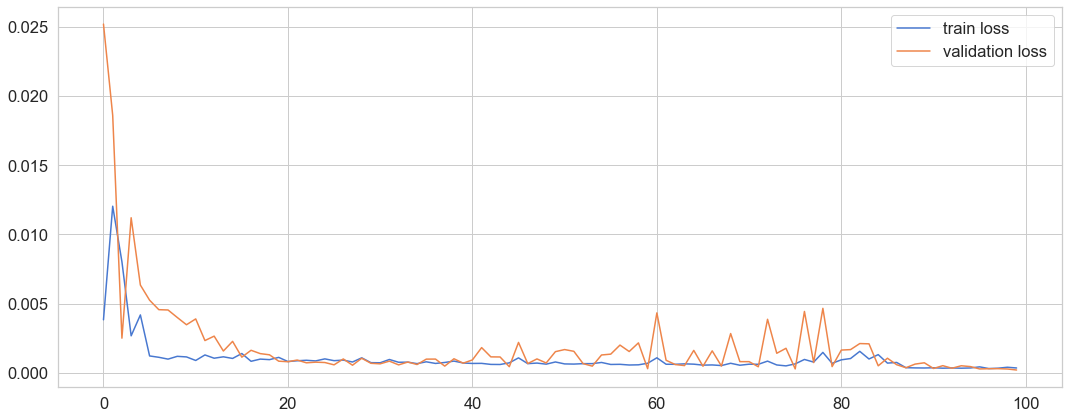

In [181]:
plt.figure(figsize=(18,7))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

In [182]:
# Prediction
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [183]:
# Transformation to original form
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
train_predict_inverse = scaler.inverse_transform(train_predict)
test_predict_inverse = scaler.inverse_transform(test_predict)

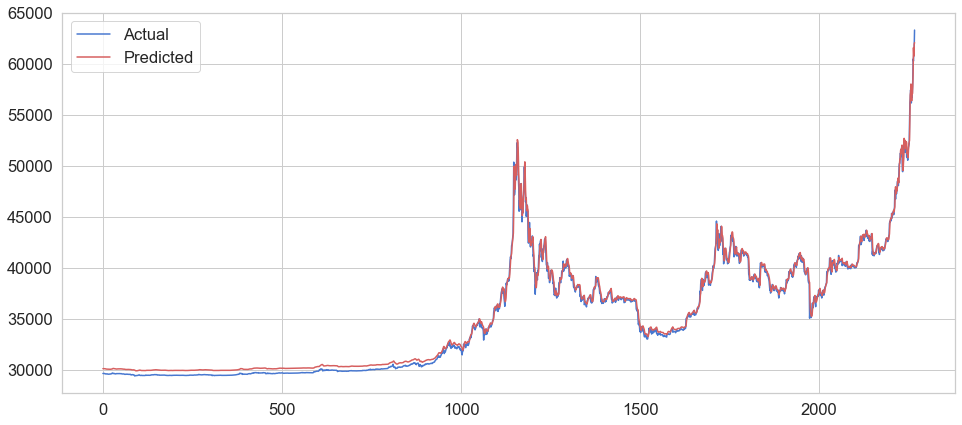

In [184]:
# Prediction on Training data
plt.figure(figsize=(16,7))
plt.plot(y_train_inverse.flatten(), label="Actual")
plt.plot(train_predict_inverse.flatten(),"r", label="Predicted")
plt.legend()

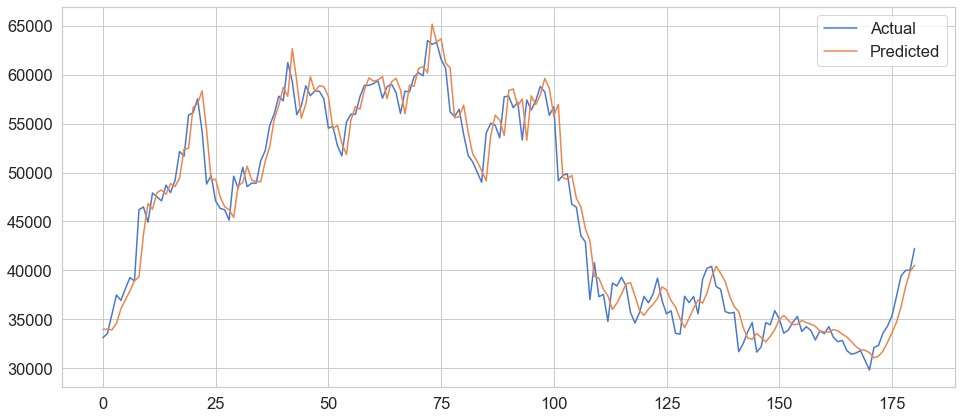

In [185]:
# Prediction on Test data
plt.figure(figsize=(16,7))
plt.plot(y_test_inverse.flatten(),label="Actual")
plt.plot(test_predict_inverse.flatten(),label="Predicted")
plt.legend()

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [187]:
train_RMSE = np.sqrt(mean_squared_error(y_train_inverse.flatten(), train_predict_inverse.flatten()))
train_MAE = np.sqrt(mean_absolute_error(y_train_inverse.flatten(), train_predict_inverse.flatten()))

LSTM_RMSE = np.sqrt(mean_squared_error(y_test_inverse.flatten(), test_predict_inverse.flatten()))
LSTM_MAE = np.sqrt(mean_absolute_error(y_test_inverse.flatten(), test_predict_inverse.flatten()))
LSTM_R2 = r2_score(y_test_inverse.flatten(), test_predict_inverse.flatten())

In [188]:
print("Train RMSE: ", train_RMSE)
print("Train MAE: ", train_MAE)

print("Test RMSE: ", LSTM_RMSE)
print("Test MAE: ", LSTM_MAE)
print("Test R2:", LSTM_R2)

Train RMSE:  498.27501041813804
Train MAE:  19.73060637308509
Test RMSE:  2073.2762424560574
Test MAE:  40.24977775057888
Test R2: 0.9578088859798635


In [189]:
print(test_predict_inverse.flatten().min())
print(test_predict_inverse.flatten().max())
print(test_predict_inverse.flatten().mean())

31052.984
65183.727
45991.914


In [190]:
def MAPE(y_actual, y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape

In [191]:
LSTM_mape = MAPE(y_test_inverse.flatten(),test_predict_inverse.flatten())
print(LSTM_mape)

3.667397025934699
